<a href="https://colab.research.google.com/github/ndbastian/DL_Example_CyberAnalytics/blob/master/CyberKDDexp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning Example for Cyber Analytics

In [1]:
# Load relevant libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from time import time
import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# Data Preprocessing
np.random.seed(1337)
scaler = StandardScaler()
df = pd.read_csv('expDataNumOnlyRemoveAttributesZerosOnly.csv')

# Setup training data
df_train = df.iloc[:20000, :]

features = ['duration', 'protocol_type', 'service', 'flag','src_bytes', 'dst_bytes',
            'wrong_fragment',	'hot',	'num_failed_logins',	'logged_in', 'num_compromised',
            'root_shell',	'su_attempted',	'num_root',	'num_file_creations','num_shells',
            'num_access_files',	'is_guest_login', 'count',	'srv_count',	'serror_rate',	'srv_serror_rate',
             'rerror_rate',	'srv_rerror_rate',	'same_srv_rate',	'diff_srv_rate',	'srv_diff_host_rate',
             'dst_host_count',	'dst_host_srv_count',	'dst_host_same_srv_rate',	'dst_host_diff_srv_rate',
             'dst_host_same_src_port_rate',	'dst_host_srv_diff_host_rate',	'dst_host_serror_rate',	'dst_host_srv_serror_rate',
             'dst_host_rerror_rate',	'dst_host_srv_rerror_rate']

X_train = scaler.fit_transform(df_train[features].values)
y_train = df_train['Result'].values
y_train_onehot = pd.get_dummies(df_train['Result']).values # one-hot encoding

# Setup testing data
df_test = df.iloc[20000:, :]
X_test = scaler.transform(df_test[features].values)
y_test = df_test['Result'].values

In [0]:
# ROC Plot Function
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

Build several neural network models






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=37, units=2)`
  





Epoch 1/10





20000/20000 [==============================] - 1s 59us/step - loss: 0.2839 - acc: 0.9014
Epoch 2/10
20000/20000 [==============================] - 1s 32us/step - loss: 0.1621 - acc: 0.9443
Epoch 3/10
20000/20000 [==============================] - 1s 32us/step - loss: 0.1513 - acc: 0.9475
Epoch 4/10
20000/20000 [==============================] - 1s 32us/step - loss: 0.1460 - acc: 0.9501
Epoch 5/10
20000/20000 [==============================] - 1s 32us/step - loss: 0.1430 - acc: 0.9519
Epoch 6/10
20000/20000 [==============================] - 1s 32us/step - loss: 0.1411 - acc: 0.9520
Epoch 7/10
20000/20000 [==============================] - 1s 33us/step - loss: 0.1395 - acc: 0.9522
Epoch 8/10
20000/20000 [==============================] - 1s 33us/step - loss: 0.1382 - acc: 0.9526
Epoch 9/10
20000/20000 [==============================] - 1s 33us/step - loss: 0.1371 - acc: 0.9526
Epoch 10/10
20000/20000 [==============================] - 1s 32us/step - loss: 0.1360 - acc

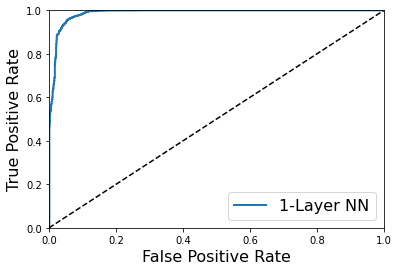

In [4]:
"""
1-layer Neural Network using Keras
"""

start = time()

model = Sequential()
model.add(Dense(input_dim=37, output_dim=2))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train_onehot, epochs=10)

print ('\ntime taken %s seconds' % str(time() - start))

y_prediction = model.predict_classes(X_test)
print ("\n\naccuracy =", np.sum(y_prediction == y_test) / float(len(y_test)))
print ("\n\nprecision =", precision_score(y_test, y_prediction))
print ("\n\nrecall =", recall_score(y_test, y_prediction))
print ("\n\nF1 =", f1_score(y_test, y_prediction))
print ("\n\nAUC =", roc_auc_score(y_test, y_prediction))

y_scores = model.predict_proba(X_test)
y_scores = y_scores[:, 1]
fpr_NN1, tpr_NN1, thresholds_NN1 = roc_curve(y_test, y_scores)
plot_roc_curve(fpr_NN1, tpr_NN1, "1-Layer NN")
plt.legend(loc="lower right", fontsize=16)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=37, units=100)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=2)`
  


Epoch 1/10
20000/20000 [==============================] - 1s 39us/step - loss: 0.1740 - acc: 0.9397
Epoch 2/10
20000/20000 [==============================] - 1s 35us/step - loss: 0.1408 - acc: 0.9506
Epoch 3/10
20000/20000 [==============================] - 1s 35us/step - loss: 0.1363 - acc: 0.9512
Epoch 4/10
20000/20000 [==============================] - 1s 35us/step - loss: 0.1337 - acc: 0.9514
Epoch 5/10
20000/20000 [==============================] - 1s 35us/step - loss: 0.1322 - acc: 0.9519
Epoch 6/10
20000/20000 [==============================] - 1s 35us/step - loss: 0.1309 - acc: 0.9532
Epoch 7/10
20000/20000 [==============================] - 1s 35us/step - loss: 0.1301 - acc: 0.9526
Epoch 8/10
20000/20000 [==============================] - 1s 36us/step - loss: 0.1296 - acc: 0.9522
Epoch 9/10
20000/20000 [==============================] - 1s 35us/step - loss: 0.1293 - acc: 0.9523
Epoch 10/10
20000/20000 [==============================] - 1s 35us/step - loss: 0.1285 - acc: 0.9535

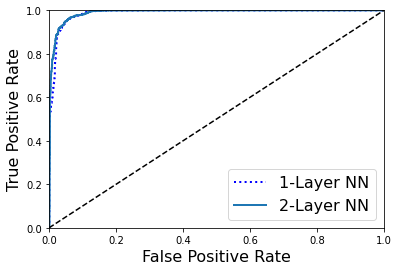

In [5]:
"""
2-layer Neural Network using Keras
"""
start = time()

model = Sequential()
model.add(Dense(input_dim=37, output_dim=100))
model.add(Dense(output_dim=2))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train_onehot,epochs=10)

print ('\ntime taken %s seconds' % str(time() - start))

y_prediction = model.predict_classes(X_test)
print ("\n\naccuracy =", np.sum(y_prediction == y_test) / float(len(y_test)))
print ("\n\nprecision =", precision_score(y_test, y_prediction))
print ("\n\nrecall =", recall_score(y_test, y_prediction))
print ("\n\nF1 =", f1_score(y_test, y_prediction))
print ("\n\nAUC =", roc_auc_score(y_test, y_prediction))

y_scores = model.predict_proba(X_test)
y_scores = y_scores[:, 1]
fpr_NN2, tpr_NN2, thresholds_NN2 = roc_curve(y_test, y_scores)
plt.plot(fpr_NN1, tpr_NN1, "b:", linewidth=2, label="1-Layer NN")
plot_roc_curve(fpr_NN2, tpr_NN2, "2-Layer NN")
plt.legend(loc="lower right", fontsize=16)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=37, units=100)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=100)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=2)`
  if __name__ == '__main__':


Epoch 1/10
20000/20000 [==============================] - 1s 44us/step - loss: 0.1598 - acc: 0.9411
Epoch 2/10
20000/20000 [==============================] - 1s 38us/step - loss: 0.1341 - acc: 0.9516
Epoch 3/10
20000/20000 [==============================] - 1s 38us/step - loss: 0.1306 - acc: 0.9518
Epoch 4/10
20000/20000 [==============================] - 1s 38us/step - loss: 0.1286 - acc: 0.9517
Epoch 5/10
20000/20000 [==============================] - 1s 38us/step - loss: 0.1298 - acc: 0.9523
Epoch 6/10
20000/20000 [==============================] - 1s 39us/step - loss: 0.1276 - acc: 0.9526
Epoch 7/10
20000/20000 [==============================] - 1s 39us/step - loss: 0.1278 - acc: 0.9521
Epoch 8/10
20000/20000 [==============================] - 1s 38us/step - loss: 0.1281 - acc: 0.9515
Epoch 9/10
20000/20000 [==============================] - 1s 39us/step - loss: 0.1276 - acc: 0.9513
Epoch 10/10
20000/20000 [==============================] - 1s 39us/step - loss: 0.1264 - acc: 0.9514

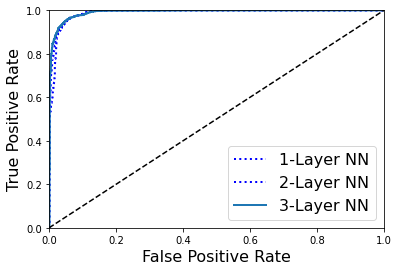

In [6]:
"""
3-layer Neural Network using Keras
"""
start = time()

model = Sequential()
model.add(Dense(input_dim=37, output_dim=100))
model.add(Dense(output_dim=100))
model.add(Dense(output_dim=2))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train_onehot, epochs=10)

print ('\ntime taken %s seconds' % str(time() - start))

y_prediction = model.predict_classes(X_test)
print ("\n\naccuracy =", np.sum(y_prediction == y_test) / float(len(y_test)))
print ("\n\nprecision =", precision_score(y_test, y_prediction))
print ("\n\nrecall =", recall_score(y_test, y_prediction))
print ("\n\nF1 =", f1_score(y_test, y_prediction))
print ("\n\nAUC =", roc_auc_score(y_test, y_prediction))

y_scores = model.predict_proba(X_test)
y_scores = y_scores[:, 1]
fpr_NN3, tpr_NN3, thresholds_NN3 = roc_curve(y_test, y_scores)
plt.plot(fpr_NN1, tpr_NN1, "b:", linewidth=2, label="1-Layer NN")
plt.plot(fpr_NN2, tpr_NN2, "b:", linewidth=2, label="2-Layer NN")
plot_roc_curve(fpr_NN3, tpr_NN3, "3-Layer NN")
plt.legend(loc="lower right", fontsize=16)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=37, units=100)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=100)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=100)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=100)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=100)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API:

Epoch 1/10
20000/20000 [==============================] - 2s 80us/step - loss: 0.1600 - acc: 0.9460
Epoch 2/10
20000/20000 [==============================] - 1s 64us/step - loss: 0.1440 - acc: 0.9488
Epoch 3/10
20000/20000 [==============================] - 1s 64us/step - loss: 0.1373 - acc: 0.9505
Epoch 4/10
20000/20000 [==============================] - 1s 65us/step - loss: 0.1369 - acc: 0.9499
Epoch 5/10
20000/20000 [==============================] - 1s 66us/step - loss: 0.1363 - acc: 0.9498
Epoch 6/10
20000/20000 [==============================] - 1s 65us/step - loss: 0.1344 - acc: 0.9516
Epoch 7/10
20000/20000 [==============================] - 1s 65us/step - loss: 0.1338 - acc: 0.9511
Epoch 8/10
20000/20000 [==============================] - 1s 63us/step - loss: 0.1307 - acc: 0.9516
Epoch 9/10
20000/20000 [==============================] - 1s 65us/step - loss: 0.1298 - acc: 0.9498
Epoch 10/10
20000/20000 [==============================] - 1s 64us/step - loss: 0.1312 - acc: 0.9506

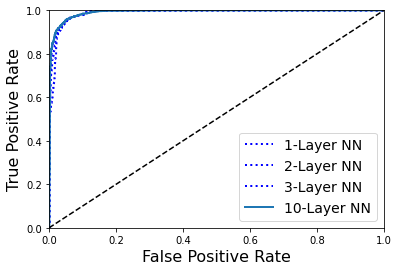

In [7]:
"""
10-layer Neural Network using Keras
"""
start = time()

model = Sequential()
model.add(Dense(input_dim=37, output_dim=100))
model.add(Dense(output_dim=100))
model.add(Dense(output_dim=100))
model.add(Dense(output_dim=100))
model.add(Dense(output_dim=100))
model.add(Dense(output_dim=100))
model.add(Dense(output_dim=100))
model.add(Dense(output_dim=100))
model.add(Dense(output_dim=100))
model.add(Dense(output_dim=2))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train_onehot, epochs=10)

print ('\ntime taken %s seconds' % str(time() - start))

y_prediction = model.predict_classes(X_test)
print ("\n\naccuracy =", np.sum(y_prediction == y_test) / float(len(y_test)))
print ("\n\nprecision =", precision_score(y_test, y_prediction))
print ("\n\nrecall =", recall_score(y_test, y_prediction))
print ("\n\nF1 =", f1_score(y_test, y_prediction))
print ("\n\nAUC =", roc_auc_score(y_test, y_prediction))

y_scores = model.predict_proba(X_test)
y_scores = y_scores[:, 1]
fpr_NN10, tpr_NN10, thresholds_NN10 = roc_curve(y_test, y_scores)
plt.plot(fpr_NN1, tpr_NN1, "b:", linewidth=2, label="1-Layer NN")
plt.plot(fpr_NN2, tpr_NN2, "b:", linewidth=2, label="2-Layer NN")
plt.plot(fpr_NN3, tpr_NN3, "b:", linewidth=2, label="3-Layer NN")
plot_roc_curve(fpr_NN10, tpr_NN10, "10-Layer NN")
plt.legend(loc="lower right", fontsize=14)
plt.show()

Build several other classification models


time taken 0.033719778060913086 seconds


accuracy = 0.9402927580893683


precision = 0.9483137829912024


recall = 0.9386792452830188


F1 = 0.9434719183078045


AUC = 0.9403987359420021


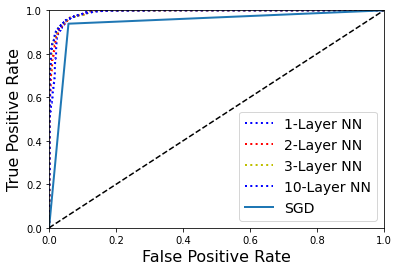

In [8]:
"""
Stochastic Gradient Descent (SGD) Classifier using Scikit-Learn
"""
start = time()

sgd_clf = SGDClassifier(random_state=42, max_iter=10, tol=None)
sgd_clf.fit(X_train, y_train)

print ('\ntime taken %s seconds' % str(time() - start))

y_prediction = sgd_clf.predict(X_test)
print ("\n\naccuracy =", np.sum(y_prediction == y_test) / float(len(y_test)))
print ("\n\nprecision =", precision_score(y_test, y_prediction))
print ("\n\nrecall =", recall_score(y_test, y_prediction))
print ("\n\nF1 =", f1_score(y_test, y_prediction))
print ("\n\nAUC =", roc_auc_score(y_test, y_prediction))

fpr_SGD, tpr_SGD, thresholds_SGD = roc_curve(y_test, y_prediction)
plt.plot(fpr_NN1, tpr_NN1, "b:", linewidth=2, label="1-Layer NN")
plt.plot(fpr_NN2, tpr_NN2, "r:", linewidth=2, label="2-Layer NN")
plt.plot(fpr_NN3, tpr_NN3, "y:", linewidth=2, label="3-Layer NN")
plt.plot(fpr_NN10, tpr_NN10, "b:", linewidth=2, label="10-Layer NN")
plot_roc_curve(fpr_SGD, tpr_SGD, "SGD")
plt.legend(loc="lower right", fontsize=14)
plt.show()


time taken 1.419839859008789 seconds


accuracy = 0.9980739599383667


precision = 0.997103548153512


recall = 0.9992743105950653


F1 = 0.998187749184487


AUC = 0.997995119172738


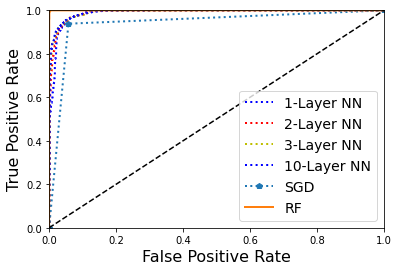

In [12]:
"""
Random Forest Classifier using Scikit-Learn
"""
start = time()

RF_clf = RandomForestClassifier(random_state=42)
RF_clf.fit(X_train, y_train)

print ('\ntime taken %s seconds' % str(time() - start))

y_prediction = RF_clf.predict_proba(X_test)
y_scores = y_prediction[:, 1]
y_prediction = (y_scores > 0.5)

print ("\n\naccuracy =", np.sum(y_prediction == y_test) / float(len(y_test)))
print ("\n\nprecision =", precision_score(y_test, y_prediction))
print ("\n\nrecall =", recall_score(y_test, y_prediction))
print ("\n\nF1 =", f1_score(y_test, y_prediction))
print ("\n\nAUC =", roc_auc_score(y_test, y_prediction))

fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, y_scores)
#plt.figure(figsize=(20, 20))
plt.plot(fpr_NN1, tpr_NN1, "b:", linewidth=2, label="1-Layer NN")
plt.plot(fpr_NN2, tpr_NN2, "r:", linewidth=2, label="2-Layer NN")
plt.plot(fpr_NN3, tpr_NN3, "y:", linewidth=2, label="3-Layer NN")
plt.plot(fpr_NN10, tpr_NN10, "b:", linewidth=2, label="10-Layer NN")
plt.plot(fpr_SGD, tpr_SGD, "p:", linewidth=2, label="SGD")
plot_roc_curve(fpr_RF, tpr_RF, "RF")
plt.legend(loc="lower right", fontsize=14)
plt.show()


time taken 0.22469496726989746 seconds


accuracy = 0.9949922958397535


precision = 0.9942070963070239


recall = 0.9963715529753265


F1 = 0.9952881478796666


AUC = 0.9949017042380738


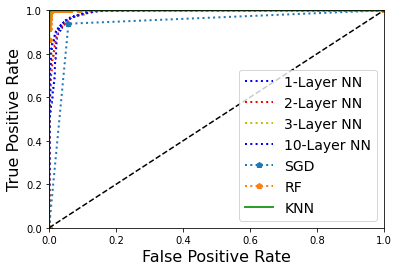

In [13]:
"""
K-Nearest Neighbors Classifier using Scikit-Learn
"""
start = time()

knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=10)
knn_clf.fit(X_train, y_train)

print ('\ntime taken %s seconds' % str(time() - start))

y_prediction = knn_clf.predict(X_test)

print ("\n\naccuracy =", accuracy_score(y_test, y_prediction))
print ("\n\nprecision =", precision_score(y_test, y_prediction))
print ("\n\nrecall =", recall_score(y_test, y_prediction))
print ("\n\nF1 =", f1_score(y_test, y_prediction))
print ("\n\nAUC =", roc_auc_score(y_test, y_prediction))

fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_scores)
#plt.figure(figsize=(20, 20))
plt.plot(fpr_NN1, tpr_NN1, "b:", linewidth=2, label="1-Layer NN")
plt.plot(fpr_NN2, tpr_NN2, "r:", linewidth=2, label="2-Layer NN")
plt.plot(fpr_NN3, tpr_NN3, "y:", linewidth=2, label="3-Layer NN")
plt.plot(fpr_NN10, tpr_NN10, "b:", linewidth=2, label="10-Layer NN")
plt.plot(fpr_SGD, tpr_SGD, "p:", linewidth=2, label="SGD")
plt.plot(fpr_RF, tpr_RF, "p:", linewidth=2, label="RF")
plot_roc_curve(fpr_KNN, tpr_KNN, "KNN")
plt.legend(loc="lower right", fontsize=14)
plt.show()


time taken 2.6193037033081055 seconds


accuracy = 0.9872881355932204


precision = 0.9898033503277495


recall = 0.9862119013062409


F1 = 0.9880043620501636


AUC = 0.9873588242163389


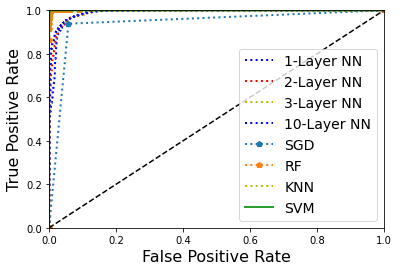

In [14]:
"""
Support Vector Machine Classifier using Scikit-Learn
"""
start = time()

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

print ('\ntime taken %s seconds' % str(time() - start))

y_prediction = svm_clf.predict(X_test)

print ("\n\naccuracy =", accuracy_score(y_test, y_prediction))
print ("\n\nprecision =", precision_score(y_test, y_prediction))
print ("\n\nrecall =", recall_score(y_test, y_prediction))
print ("\n\nF1 =", f1_score(y_test, y_prediction))
print ("\n\nAUC =", roc_auc_score(y_test, y_prediction))

fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, y_scores)
#plt.figure(figsize=(20, 20))
plt.plot(fpr_NN1, tpr_NN1, "b:", linewidth=2, label="1-Layer NN")
plt.plot(fpr_NN2, tpr_NN2, "r:", linewidth=2, label="2-Layer NN")
plt.plot(fpr_NN3, tpr_NN3, "y:", linewidth=2, label="3-Layer NN")
plt.plot(fpr_NN10, tpr_NN10, "b:", linewidth=2, label="10-Layer NN")
plt.plot(fpr_SGD, tpr_SGD, "p:", linewidth=2, label="SGD")
plt.plot(fpr_RF, tpr_RF, "p:", linewidth=2, label="RF")
plt.plot(fpr_KNN, tpr_KNN, "y:", linewidth=2, label="KNN")
plot_roc_curve(fpr_SVM, tpr_SVM, "SVM")
plt.legend(loc="lower right", fontsize=14)
plt.show()